In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import calendar

In [2]:
#Setting directory and read csv output from the GEE
belmontdir2 = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData2/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv" 
df_allntl = pd.read_csv(belmontdir2 + doyNTL_allgrid3)

# Convert 'YYYY_MM_DD' column to datetime
df_allntl['YYYY_MM_DD'] = pd.to_datetime(df_allntl['YYYY_MM_DD'])

# Display the first few rows to verify the conversion
# print(df_allntl.head())

# Pivot the table
date_df = df_allntl.pivot(index='settl_pcod', columns='YYYY_MM_DD', values='NTLmean')

# Save the modified DataFrame to a CSV file
output_file = belmontdir2 + "allNTL_allgrid3_datetime.csv"
date_df.to_csv(output_file, index=True)  # Set index=True to include 'settl_pcod' in the CSV

In [3]:
date_df

YYYY_MM_DD,2012-01-19,2012-01-20,2012-01-21,2012-01-22,2012-01-23,2012-01-24,2012-01-25,2012-01-26,2012-01-27,2012-01-28,...,2023-12-21,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30
settl_pcod,,,,,,,,,,,,,,,,,,,,,
MG00000000032,0.404007,0.382916,0.382916,0.392612,0.383080,0.383080,0.383080,0.896500,1.045115,0.556032,...,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623
MG00000000033,0.472597,0.469730,0.469730,0.469730,0.469730,0.469730,0.469730,0.702417,0.934401,0.627712,...,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588
MG00000000037,0.205324,0.177662,0.177662,0.177662,0.177662,0.177662,0.177662,0.350626,0.239666,0.568685,...,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292
MG00000000038,0.213136,0.213136,0.213136,0.218590,0.213136,0.213136,0.213136,0.402815,0.400415,0.477744,...,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923
MG11000000001,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.518327,0.337185,0.685458,...,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG72716000003,0.665745,0.679804,0.678874,0.929711,0.589105,0.637498,0.559202,0.557533,0.555213,0.555213,...,3.665256,3.000000,2.638690,2.722193,2.928020,1.551357,2.928020,2.918797,2.928020,2.634741
MG72716000206,0.117037,0.117037,0.117037,0.371347,0.150026,0.150026,0.118689,0.130769,0.130769,0.130769,...,0.546773,0.778369,0.186577,0.196696,0.215901,0.215901,0.215901,0.215901,0.215901,0.215901
MG72716000242,0.108261,0.108261,0.108261,0.431848,0.141630,0.139457,0.108152,0.139457,0.139457,0.213370,...,0.629348,0.879783,0.330435,0.418587,0.149891,0.007500,0.149891,0.149891,0.149891,0.300109


In [4]:
# Next up is the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir2 +"MadTrack_SegmentID_DATE.shp")
#print(cyclone_track_gdf.columns)
columns_to_keep = ['NAME', 'DATE', 'Segment_ID', 'NATURE']
onset_df = cyclone_track_gdf[columns_to_keep]
onset_df = onset_df.rename(columns={'NAME': 'Cyclone', 'DATE': 'Onset_Date'})
print(onset_df.columns)

Index(['Cyclone', 'Onset_Date', 'Segment_ID', 'NATURE'], dtype='object')


In [5]:
# Define the lag value
lag = 14 

In [6]:
import pandas as pd
from scipy.stats import linregress

# Assuming 'onset_df', 'date_df', and 'lag' are defined as before
# Ensure 'Onset_Date' is in datetime format
onset_df.loc[:, 'Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Remove duplicate rows based on the 'Cyclone' column
onset_df = onset_df.drop_duplicates(subset='Cyclone', keep='first')

# Filter unique cyclone names based on onset dates after 2011
valid_cyclone_names = onset_df[onset_df['Onset_Date'].dt.year >= 2012]['Cyclone'].unique()

# Initialize an empty DataFrame to store the results
final_df = pd.DataFrame(columns=['Cyclone', 'Settle_PCOD', 'hist_pre_slope', 'hist_post_slope', 'Onset_Date'])

# Iterate over each valid cyclone name
for cyclone_name in valid_cyclone_names:
    # Iterate over each settle_pcod value
    for settle_pcod in date_df.index:
        result_dict = {'Settle_PCOD': settle_pcod, 'Cyclone': cyclone_name}
        
        # Check if cyclone onset information exists
        if cyclone_name in onset_df['Cyclone'].values:
            cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]
            
            # Pre-cyclone period slope calculation
            pre_start_date = cyclone_onset_date - pd.Timedelta(days=lag)
            pre_end_date = cyclone_onset_date
            pre_filtered_dates = date_df.columns[(date_df.columns >= pre_start_date) & (date_df.columns <= pre_end_date)]
            if not pre_filtered_dates.empty:
                pre_days = (pre_filtered_dates - pre_filtered_dates.min()).days
                pre_values = date_df.loc[settle_pcod, pre_filtered_dates]
                slope, _, _, _, _ = linregress(pre_days, pre_values)
                result_dict['hist_pre_slope'] = slope
        
            # Post-cyclone period slope calculation
            post_start_date = cyclone_onset_date
            post_end_date = post_start_date + pd.Timedelta(days=lag)
            post_filtered_dates = date_df.columns[(date_df.columns >= post_start_date) & (date_df.columns <= post_end_date)]
            if not post_filtered_dates.empty:
                post_days = (post_filtered_dates - post_filtered_dates.min()).days
                post_values = date_df.loc[settle_pcod, post_filtered_dates]
                slope, _, _, _, _ = linregress(post_days, post_values)
                result_dict['hist_post_slope'] = slope

        else:
            print(f"Cyclone '{cyclone_name}' not found in the dataset.")

        # Append the result dictionary to the final DataFrame
        final_df = final_df.append(result_dict, ignore_index=True)

# Add 'Onset_Date' column by mapping the cyclone names from onset_df
final_df['Onset_Date'] = final_df['Cyclone'].map(onset_df.set_index('Cyclone')['Onset_Date'])

# The final DataFrame now includes the 'Onset_Date' column, reordered appropriately
final_df = final_df[['Cyclone', 'Settle_PCOD', 'hist_pre_slope', 'hist_post_slope', 'Onset_Date']]


In [7]:
import numpy as np
from scipy.stats import linregress

# Assuming 'date_df' and 'final_df' are defined, and 'date_df.columns' are datetime
for idx, row in final_df.iterrows():
    settl_pcod = row['Settle_PCOD']
    onset_date = pd.to_datetime(row['Onset_Date'])

    pre_start = onset_date - pd.Timedelta(days=lag)
    post_end = onset_date + pd.Timedelta(days=lag)

    if settl_pcod in date_df.index:
        settl_data = date_df.loc[settl_pcod]

        # For both pre and post periods, convert date indices to a numerical form (days from start)
        pre_data = settl_data[(settl_data.index >= pre_start) & (settl_data.index < onset_date)]
        post_data = settl_data[(settl_data.index > onset_date) & (settl_data.index <= post_end)]

        # Calculate the slopes for pre and post periods
        if not pre_data.empty:
            pre_days = (pre_data.index - pre_data.index.min()).days
            pre_slope, _, _, _, _ = linregress(pre_days, pre_data.values)
            final_df.at[idx, 'cyclone_pre_slope'] = pre_slope
        else:
            final_df.at[idx, 'cyclone_pre_slope'] = np.nan  # Handle cases with no data

        if not post_data.empty:
            post_days = (post_data.index - post_data.index.min()).days
            post_slope, _, _, _, _ = linregress(post_days, post_data.values)
            final_df.at[idx, 'cyclone_post_slope'] = post_slope
        else:
            final_df.at[idx, 'cyclone_post_slope'] = np.nan  # Handle cases with no data


In [9]:
# Ensure the relevant slope columns are in a numeric format for calculation
final_df['cyclone_pre_slope'] = pd.to_numeric(final_df['cyclone_pre_slope'], errors='coerce')
final_df['cyclone_post_slope'] = pd.to_numeric(final_df['cyclone_post_slope'], errors='coerce')
final_df['hist_pre_slope'] = pd.to_numeric(final_df['hist_pre_slope'], errors='coerce')
final_df['hist_post_slope'] = pd.to_numeric(final_df['hist_post_slope'], errors='coerce')

# Calculate the slope difference for cyclone and historical data, and add them as new columns
final_df['cyclone_slope_diff_PD'] = (final_df['cyclone_post_slope'] - final_df['cyclone_pre_slope']) / final_df['cyclone_pre_slope'] * 100
final_df['hist_slope_diff_PD'] = (final_df['hist_post_slope'] - final_df['hist_pre_slope']) / final_df['hist_pre_slope'] * 100

# If you still want to compare these differences in a meaningful way, you might consider doing so directly
# Note: direct subtraction to compare the changes in slopes might be more meaningful than percent differences
# because slopes are already rates of change.
final_df['slope_diff_change_PD'] = final_df['cyclone_slope_diff_PD'] - final_df['hist_slope_diff_PD']
final_df

,Cyclone,Settle_PCOD,hist_pre_slope,hist_post_slope,Onset_Date,cyclone_pre_slope,cyclone_post_slope,cyclone_slope_diff_PD,hist_slope_diff_PD,slope_diff_change_PD
0,CHANDA,MG00000000032,NaN,-0.010545,2012-01-07,NaN,-0.010545,NaN,NaN,NaN
1,CHANDA,MG00000000033,NaN,-0.001433,2012-01-07,NaN,-0.001433,NaN,NaN,NaN
2,CHANDA,MG00000000037,NaN,-0.013831,2012-01-07,NaN,-0.013831,NaN,NaN,NaN
3,CHANDA,MG00000000038,NaN,0.000000,2012-01-07,NaN,0.000000,NaN,NaN,NaN
4,CHANDA,MG11000000001,NaN,0.000000,2012-01-07,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22605,FREDDY,MG72716000003,0.038468,-0.004232,2023-02-21,0.043117,-0.003168,-107.347261,-111.001139,3.653879
22606,FREDDY,MG72716000206,-0.001853,-0.003616,2023-02-21,-0.000163,-0.007376,4436.370056,95.077016,4341.293040
22607,FREDDY,MG72716000242,-0.000344,0.002920,2023-02-21,0.000683,-0.000914,-233.827586,-949.554566,715.726979
22608,FREDDY,MG72716000429,-0.010450,-0.006902,2023-02-21,-0.010336,-0.010017,-3.083945,-33.953791,30.869847


In [10]:
# # Ensure the relevant columns are in a numeric format for calculation
# final_df['cyclone_pre_average'] = pd.to_numeric(final_df['cyclone_pre_average'], errors='coerce')
# final_df['cyclone_post_average'] = pd.to_numeric(final_df['cyclone_post_average'], errors='coerce')

# # Calculate the percent difference and add it as a new column
# final_df['cyclone_PD'] = ((final_df['cyclone_post_average'] - final_df['cyclone_pre_average']) / final_df['cyclone_pre_average']) * 100
# final_df['hist_cyclone_PD'] = ((final_df['hist_post_average'] - final_df['hist_pre_average']) / final_df['hist_pre_average']) * 100

# final_df['PD'] =  final_df['cyclone_PD'] - final_df['hist_cyclone_PD']
# final_df

In [11]:
row = final_df[(final_df['Cyclone'] == 'BATSIRAI') & (final_df['Settle_PCOD'] == 'MG23209000001')]
print(row)

        Cyclone    Settle_PCOD  hist_pre_slope  hist_post_slope Onset_Date  \
18155  BATSIRAI  MG23209000001        0.005843        -0.014045 2022-02-05   

       cyclone_pre_slope  cyclone_post_slope  cyclone_slope_diff_PD  \
18155           0.016736           -0.011326             -167.67672   

       hist_slope_diff_PD  slope_diff_change_PD  
18155         -340.379922            172.703202  


In [12]:
final_df

,Cyclone,Settle_PCOD,hist_pre_slope,hist_post_slope,Onset_Date,cyclone_pre_slope,cyclone_post_slope,cyclone_slope_diff_PD,hist_slope_diff_PD,slope_diff_change_PD
0,CHANDA,MG00000000032,NaN,-0.010545,2012-01-07,NaN,-0.010545,NaN,NaN,NaN
1,CHANDA,MG00000000033,NaN,-0.001433,2012-01-07,NaN,-0.001433,NaN,NaN,NaN
2,CHANDA,MG00000000037,NaN,-0.013831,2012-01-07,NaN,-0.013831,NaN,NaN,NaN
3,CHANDA,MG00000000038,NaN,0.000000,2012-01-07,NaN,0.000000,NaN,NaN,NaN
4,CHANDA,MG11000000001,NaN,0.000000,2012-01-07,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22605,FREDDY,MG72716000003,0.038468,-0.004232,2023-02-21,0.043117,-0.003168,-107.347261,-111.001139,3.653879
22606,FREDDY,MG72716000206,-0.001853,-0.003616,2023-02-21,-0.000163,-0.007376,4436.370056,95.077016,4341.293040
22607,FREDDY,MG72716000242,-0.000344,0.002920,2023-02-21,0.000683,-0.000914,-233.827586,-949.554566,715.726979
22608,FREDDY,MG72716000429,-0.010450,-0.006902,2023-02-21,-0.010336,-0.010017,-3.083945,-33.953791,30.869847


In [13]:
# Write the DataFrame to a CSV file
final_df.to_csv(belmontdir2 + 'value_all_data.csv', index=False)

print("CSV file 'value_all_data.csv' has been created.")

CSV file 'value_all_data.csv' has been created.


In [14]:
# Creating a pivot table for visualization
pivot_df = final_df.pivot("Cyclone", "Settle_PCOD", "slope_diff_change_PD")
# pivot_df

In [15]:
min_dist_df = pd.read_csv(belmontdir2 + 'grid3_alldata.csv')
min_dist_df_filtered = min_dist_df.filter(regex='_minDist$|^settl_pcod$')
min_dist_df_filtered.set_index('settl_pcod', inplace=True)
print(min_dist_df_filtered.head())

               ABELA_minDist  ALIBERA_minDist  ALIFREDY_minDist  \
settl_pcod                                                        
MG11117000035  528636.487368    214882.127648     432952.202496   
MG11117000050  529737.499948    222002.970453     437971.508211   
MG11117000070  526032.185320    223957.172259     440777.471469   
MG11117000080  526114.998038    227585.900283     443275.953298   
MG11117000081  526978.195198    228516.262322     443671.726396   

               ANAIS_minDist    ANA_minDist  ANDRY_minDist  ANETY_minDist  \
settl_pcod                                                                  
MG11117000035  378417.149193  504527.092014   33401.339863  552143.966699   
MG11117000050  380868.323519  495614.860429   34395.307935  549110.621012   
MG11117000070  377375.832555  494803.985429   37914.405039  545696.151582   
MG11117000080  377930.460655  490804.829171   37991.044615  543875.121015   
MG11117000081  379170.261497  489847.360510   37395.033866  544105.2

In [16]:
# Step 1: Transpose the DataFrame
transposed_df = min_dist_df_filtered.T

# Step 2: Reset the index to turn the index into a column for cyclone names
transposed_df = transposed_df.reset_index()

# Step 3: Rename the 'index' column to 'Cyclone'
transposed_df.rename(columns={'index': 'Cyclone'}, inplace=True)

# Step 4: Remove '_minDist' suffix from 'Cyclone' column
transposed_df['Cyclone'] = transposed_df['Cyclone'].str.replace('_minDist', '')

# If the goal is to have a 'long format' DataFrame:
# Melt the DataFrame
melted_df = transposed_df.melt(id_vars=['Cyclone'], var_name='Settle_PCOD', value_name='Distance')

melted_df

,Cyclone,Settle_PCOD,Distance
0,ABELA,MG11117000035,528636.487368
1,ALIBERA,MG11117000035,214882.127648
2,ALIFREDY,MG11117000035,432952.202496
3,ANAIS,MG11117000035,378417.149193
4,ANA,MG11117000035,504527.092014
...,...,...,...
85115,KLARA,MG72716000438,438959.617674
85116,KOLIA,MG72716000438,758917.173008
85117,LITANNE,MG72716000438,553142.855131
85118,MANOU,MG72716000438,589589.078728


In [17]:
# Ensure cyclone names are in a column for pivot_df
if pivot_df.index.name == 'Cyclone' or 'Cyclone' in pivot_df.columns:
    common_cyclones = pivot_df.reset_index()['Cyclone'].unique()
else:
    # Assuming the column that contains cyclone names is named differently
    # Replace 'YourCycloneColumnName' with the actual column name
    common_cyclones = pivot_df['YourCycloneColumnName'].unique()

# Filter melted_df for rows where the cyclone name is in the list of common cyclones
min_dist_final_df = melted_df[melted_df['Cyclone'].isin(common_cyclones)]

min_dist_final_df

,Cyclone,Settle_PCOD,Distance
0,ABELA,MG11117000035,5.286365e+05
3,ANAIS,MG11117000035,3.784171e+05
4,ANA,MG11117000035,5.045271e+05
11,AVA,MG11117000035,5.889687e+04
13,BATSIRAI,MG11117000035,2.196167e+05
...,...,...,...
85091,IMAN,MG72716000438,6.559427e+05
85095,IRINA,MG72716000438,2.533192e+04
85100,JASMINE,MG72716000438,1.118124e+06
85103,JOBO,MG72716000438,4.660861e+05


In [18]:
# # Sort the DataFrame first by 'Cyclone' and then by 'Distance' to ensure ranking is correct
# min_dist_final_df_sorted = min_dist_final_df.sort_values(by=['Cyclone', 'Distance'])

# # Use groupby on 'Cyclone' and then rank the 'Distance' within each group
# min_dist_final_df_sorted['Distance_Rank'] = min_dist_final_df_sorted.groupby('Cyclone')['Distance'].rank(method='min')

# # Now, min_dist_final_df_sorted contains an additional column 'Distance_Rank' indicating the rank of each settlement within its cyclone group based on distance
# min_dist_final_df_sorted

### Visualising 50 Settlements with the Lowest PD Values

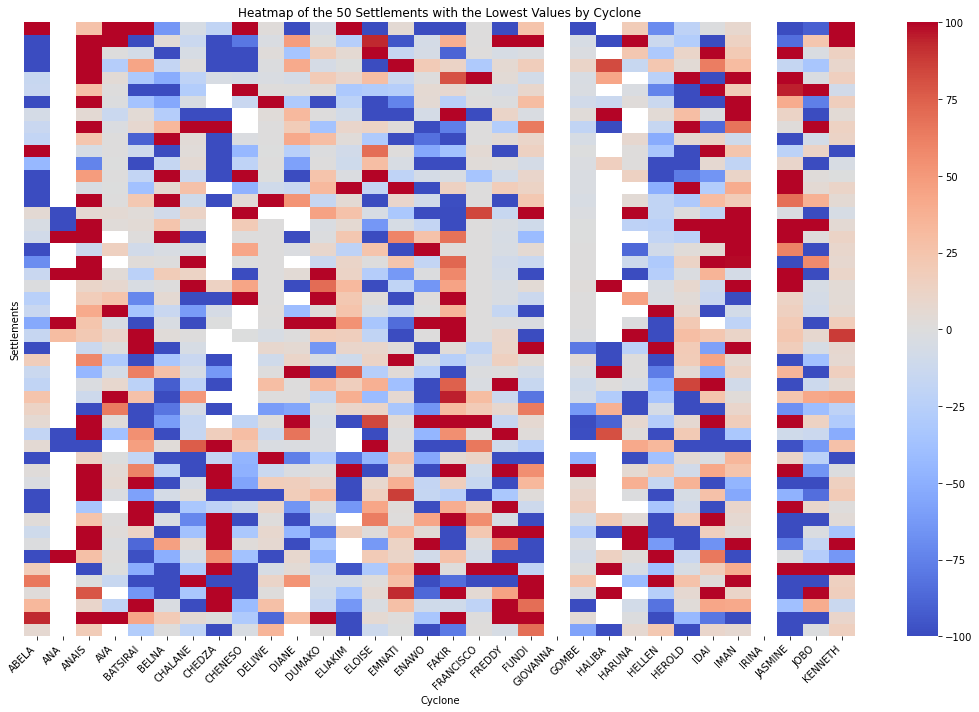

In [28]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 50 settlements with the lowest values
lowest_50_settlements = min_values.nsmallest(50).index

# Step 4: Filter the DataFrame to include only these lowest 50 settlements
filtered_df = pivot_df_filtered[lowest_50_settlements]

# Transpose the DataFrame to pivot the chart
transposed_df = filtered_df.T

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(transposed_df, cmap="coolwarm", xticklabels=True, yticklabels=False, annot=False, vmin=-100, vmax=100)
plt.title("Heatmap of the 50 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Cyclone")
plt.ylabel("Settlements")
plt.xticks(rotation=45, ha="right")  # Rotate cyclone names for better readability
plt.tight_layout()
plt.show()


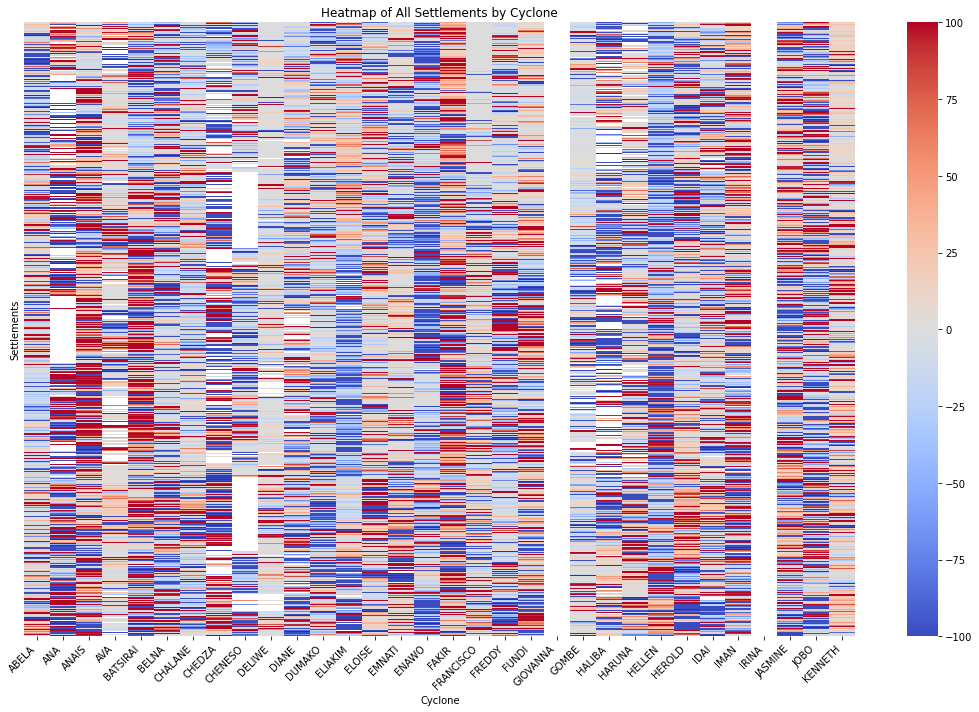

In [27]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Transpose the DataFrame to pivot the chart
transposed_df = pivot_df_filtered.T

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary based on the number of settlements
sns.heatmap(transposed_df, cmap="coolwarm", xticklabels=True, yticklabels=False, annot=False, vmin=-100, vmax=100)
plt.title("Heatmap of All Settlements by Cyclone")
plt.xlabel("Cyclone")
plt.ylabel("Settlements")
plt.xticks(rotation=45, ha="right")  # Rotate cyclone names for better readability
plt.tight_layout()
plt.show()


In [22]:
# Printing the columns of the filtered_df DataFrame
print(filtered_df.columns)

Index(['MG11106000026', 'MG11115000235', 'MG12000000013', 'MG12000000014',
       'MG12000000021', 'MG12000000030', 'MG12108000014', 'MG12118000031',
       'MG12118000035', 'MG12118000175', 'MG12118000196', 'MG12118000210',
       'MG12118000378', 'MG12118000411', 'MG12118000553', 'MG12120000026',
       'MG12120000063', 'MG13112000001', 'MG13112000002', 'MG13112000036',
       'MG13112000129', 'MG13113000001', 'MG13113000257', 'MG14111000003',
       'MG14111000182', 'MG14119000262', 'MG21208000139', 'MG21220000079',
       'MG21220000097', 'MG23207000260', 'MG23210000031', 'MG25214000133',
       'MG31307000002', 'MG32303000001', 'MG32303000169', 'MG32305000116',
       'MG32305000294', 'MG32305000358', 'MG32305000374', 'MG32315000001',
       'MG32318000001', 'MG32318000058', 'MG32318000082', 'MG32318000228',
       'MG32318000230', 'MG33312000003', 'MG33312000010', 'MG33312000102',
       'MG33312000200', 'MG33313000407'],
      dtype='object', name='Settle_PCOD')


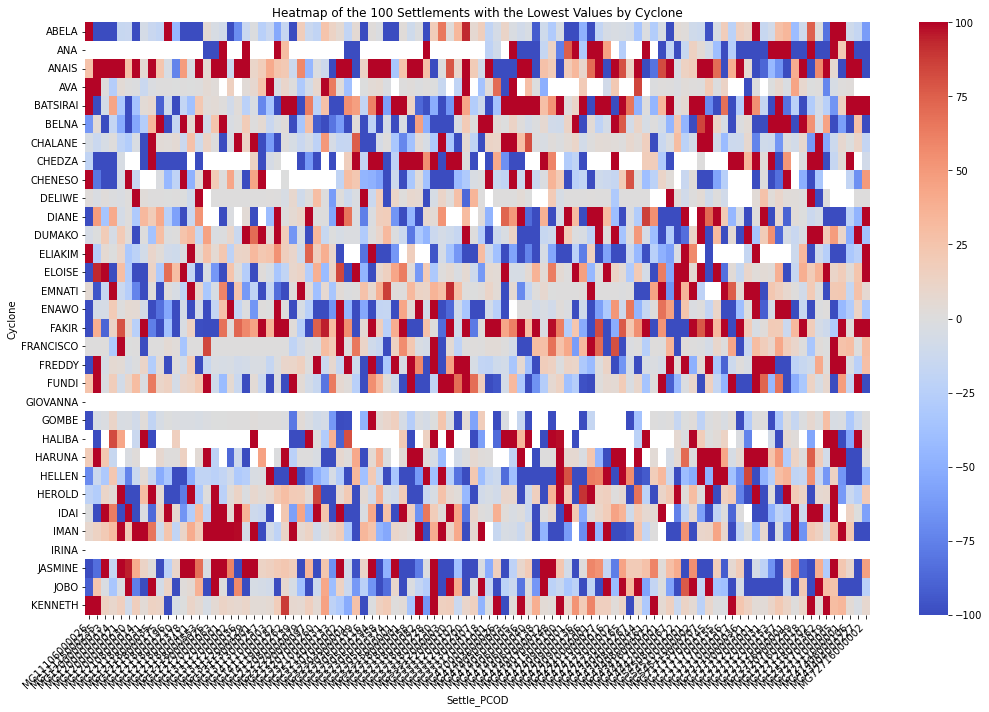

In [29]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 100 settlements with the lowest values
lowest_100_settlements = min_values.nsmallest(100).index

# Step 4: Filter the DataFrame to include only these lowest 100 settlements
filtered_df = pivot_df_filtered[lowest_100_settlements]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(filtered_df, cmap="coolwarm", xticklabels=True, yticklabels=True, annot=False, vmin=-100, vmax=100)  # Set annot=True if you want to see the values
plt.title("Heatmap of the 100 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.tight_layout()
plt.show()

Cyclone               ABELA
Settle_PCOD                
MG23206000081 -3.060685e+04
MG31306000207 -7.420535e+03
MG32305000374 -4.655492e+03
MG44421000018 -4.378769e+03
MG51512000158 -4.204128e+03
...                     ...
MG33314000116  3.599990e+03
MG33313000107  4.254776e+03
MG32304000001  4.493484e+03
MG22204000051  1.367635e+04
MG11106000026  2.403493e+06

[665 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

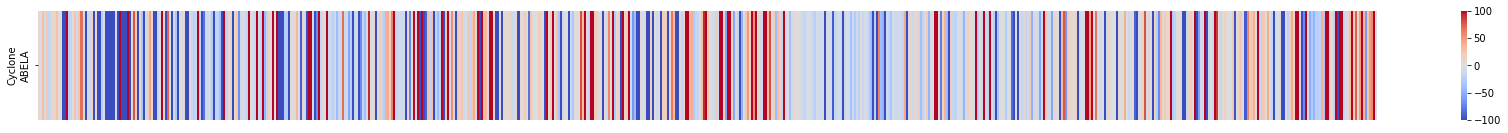

In [65]:
# Filtering the DataFrame to only include BATSIRAI
df_cyclone = pivot_df.loc[["ABELA"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_cyclone_transposed = df_cyclone.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_cyclone_sorted = df_cyclone_transposed.sort_values(by="ABELA")

# Display the sorted DataFrame
print(df_cyclone_sorted)
# Visualizing the heatmap for BATSIRAI
plt.figure(figsize=(30, 2))  
sns.heatmap(df_cyclone, cmap="coolwarm", xticklabels=False, yticklabels=True, annot=False, vmin=-100, vmax=100)
plt.title("")
plt.xlabel("")
plt.ylabel("Cyclone")
plt.show

In [66]:
### Ranking of settlements based on minimum distance for different cyclones <200km

# Filtering the DataFrame to only include BATSIRAI
df_cyclone = pivot_df.loc[["ABELA"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_cyclone_transposed = df_cyclone.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_cyclone_sorted = df_cyclone_transposed.sort_values(by="ABELA")


def rank_settlements_for_cyclone(min_dist_final_df, cyclone_name, cyclone_col='Cyclone', distance_col='Distance'):
    """
    Ranks settlements within a specific cyclone group based on their distance, only including settlements with distances < 200,000.
    If no cyclone name is provided, ranks settlements within all cyclone groups by default for BATSIRAI.

    Parameters:
    - min_dist_final_df: DataFrame containing the cyclone names, settlements, and distances.
    - cyclone_name: Specific name of the cyclone to filter the DataFrame by. Defaults to 'BATSIRAI'.
    - cyclone_col: Name of the column in df that contains the cyclone names. Defaults to 'Cyclone'.
    - distance_col: Name of the column in df that contains the distances. Defaults to 'Distance'.

    Returns:
    - DataFrame with an additional column 'Distance_Rank' indicating the rank of each settlement's distance within the specified (or each) cyclone group, for distances < 200,000.
    """
    # Filter the DataFrame for a specific cyclone if cyclone_name is provided
    if cyclone_name:
        filtered_df = min_dist_final_df[min_dist_final_df[cyclone_col] == cyclone_name]

    # Further filter to include only settlements with distances < 200,000
    filtered_df = filtered_df[filtered_df[distance_col] < 200000]
    
    # Proceed with the sorting and ranking
    sorted_df = filtered_df.sort_values(by=[distance_col])
    sorted_df['Distance_Rank'] = sorted_df[distance_col].rank(method='min')

    return sorted_df

# Use the adjusted function to rank settlements for 'BATSIRAI', including only those with distances < 200,000
ranked_settlements_cyclone = rank_settlements_for_cyclone(min_dist_final_df, 'ABELA', 'Cyclone', 'Distance')

# Now, ranked_settlements_cyclone includes only the settlements meeting the distance criterion, ranked accordingly.
ranked_settlements_cyclone
print(ranked_settlements_cyclone.head(20))

      Cyclone    Settle_PCOD      Distance  Distance_Rank
81536   ABELA  MG72710000001  41402.135336            1.0
81792   ABELA  MG72710000036  49367.709208            2.0
81920   ABELA  MG72710000301  50812.452869            3.0
82048   ABELA  MG72710000311  56171.696871            4.0
61184   ABELA  MG32303000002  64345.994973            5.0
61312   ABELA  MG32303000003  66926.660145            6.0
61568   ABELA  MG32303000005  68257.921591            7.0
61696   ABELA  MG32303000126  70771.272804            8.0
81664   ABELA  MG72710000017  72901.000481            9.0
62208   ABELA  MG32303000173  80154.927344           10.0
82176   ABELA  MG72710000363  80681.143140           11.0
61056   ABELA  MG32303000001  81980.000158           12.0
62464   ABELA  MG32303000280  84002.314358           13.0
62080   ABELA  MG32303000169  88347.724922           14.0
62336   ABELA  MG32303000279  89030.330460           15.0
61440   ABELA  MG32303000004  91375.714926           16.0
83072   ABELA 

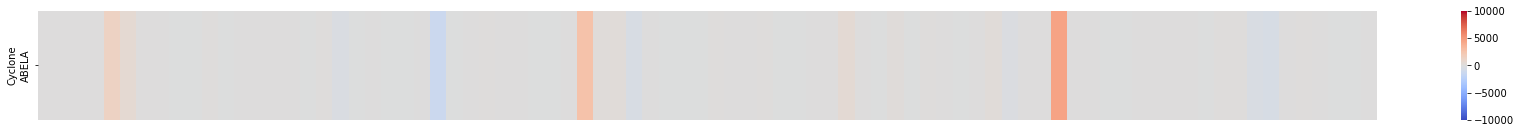

In [67]:
ranked_settlements_cyclone
ordered_settlements = ranked_settlements_cyclone.sort_values('Distance_Rank', ascending=True)['Settle_PCOD'].tolist()
# Reorder the columns of pivot_df based on ordered_settlements
pivot_df_reordered = df_cyclone[ordered_settlements]

# Plot the heatmap
plt.figure(figsize=(30, 2))  # Adjust figure size as needed
sns.heatmap(pivot_df_reordered, cmap="coolwarm", xticklabels=False, yticklabels=True, annot=False, vmin=-10000, vmax=10000)
plt.title(f"")
plt.xlabel("")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Improve readability of settlement labels
plt.show()